In [1]:
count = input("回数を入力してください: ")
type_val = input("種類を入力してください: ")
pressure_val = input("圧力を入力してください: ")

pressure_val = f"0.{pressure_val}"  

回数を入力してください:  tesy
種類を入力してください:  test
圧力を入力してください:  test


start!
saved as 20231206_tesy_test_0.test_all_p.csv!


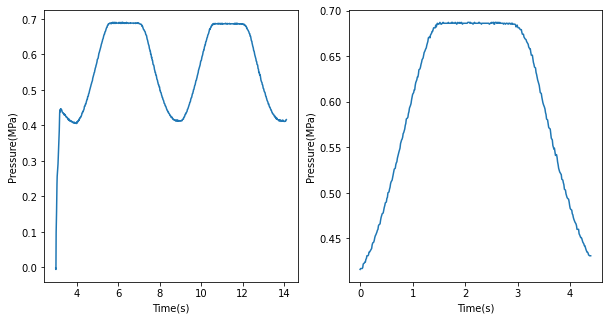

In [3]:
import matplotlib.pyplot as plt
import datetime
import time
import serial

com = serial.Serial("COM15", 115200)

start_time = 10
end_time = 14.4

path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\input\\'

file_name_all = f"{datetime.datetime.now().strftime('%Y%m%d')}_{count}_{type_val}_{pressure_val}_all_p"
file_name_partial = f"{datetime.datetime.now().strftime('%Y%m%d')}_{count}_{type_val}_{pressure_val}_partial_p"
date = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

print('start!')

t0 = time.time()

# データを保存するリスト
all_time_vals = []
all_p_vals = []
partial_time_vals = []
partial_p_vals = []
partial_start_time = None  # ユーザー指定時間の初めてのデータを格納した時間

with open(path + file_name_all + ".csv", "a", encoding='cp1252') as all_f:
    print("time,p,voltage", file=all_f)
    
    with open(path + file_name_partial + ".csv", "a", encoding='cp1252') as partial_f:
        print("time,p,voltage", file=partial_f)

        while True:
            t = time.time()
            t_inner = t - t0
            if t_inner > 15:
                print("saved as " + file_name_all + ".csv" + "!")
                break

            val = str(com.readline().decode('cp1252').rstrip("\r\n"))
            parts = val.split(',')
            time_val = float(parts[0])
            p_val = float(parts[1]) / 10.0  # bar から MPa への変換

            # すべてのデータをリストに追加
            all_time_vals.append(time_val)
            all_p_vals.append(p_val)

            # 15秒間のデータをファイルに書き込む
            print("{},{},{}".format(time_val, p_val, parts[2]), file=all_f)

            # ユーザー指定の時間範囲内のデータを処理
            if t_inner >= start_time and t_inner <= end_time:
                # 部分的なデータをリストに追加
                if partial_start_time is None:
                    partial_start_time = time_val
                partial_time_vals.append(time_val - partial_start_time)  # 開始時間から引くことで0からの相対時間に
                partial_p_vals.append(p_val)

                # ファイルに部分的なデータを書き込む
                print("{},{},{}".format(time_val, p_val, parts[2]), file=partial_f)

# 15秒間のデータのグラフの描画
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(all_time_vals, all_p_vals)
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')

# ユーザー指定の時間範囲内のデータのグラフの描画
plt.subplot(1, 2, 2)
plt.plot(partial_time_vals, partial_p_vals)
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')

# グラフを保存
save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\pressure_control\\input\\'
plt.savefig(save_path + file_name_all + '_input.jpg')
plt.savefig(save_path + file_name_partial + '_input.jpg')

# グラフを表示
plt.show()

com.close()
